# Nipype-SPM fMRI Analysis 
## Subject and Group Level Analysis Workflows

####

**Author:** Monika Doerig

**Date:** 13 June 2024

### Citation and Resources: 

#### Tools included in this workflow
__Nipype:__
- Esteban, O., Markiewicz, C. J., Burns, C., Goncalves, M., Jarecka, D., Ziegler, E., Berleant, S., Ellis, D. G., Pinsard, B., Madison, C., Waskom, M., Notter, M. P., Clark, D., Manhães-Savio, A., Clark, D., Jordan, K., Dayan, M., Halchenko, Y. O., Loney, F., … Ghosh, S. (2025). nipy/nipype: 1.8.6 (1.8.6). Zenodo. [https://doi.org/10.5281/zenodo.15054147](https://doi.org/10.5281/zenodo.15054147)

__SPM12:__
- Friston, K. J. (2007). Statistical parametric mapping: The analysis of functional brain images (1st ed). Elsevier / Academic Press.

- [Online Book](https://www.fil.ion.ucl.ac.uk/spm/doc/books/spm/Statistical_Parametric_Mapping_The_Analysis_of_Functional_Brain_Images.pdf)

#### Dataset

- Wakeman, DG and Henson, RN (2021). Multisubject, multimodal face processing. OpenNeuro. [Dataset] doi: [10.18112/openneuro.ds000117.v1.0.5](https://openneuro.org/datasets/ds000117/versions/1.0.5)

- Wakeman, D.G. & Henson, R.N. (2015). A multi-subject, multi-modal human neuroimaging dataset. Sci. Data 2:150001 doi: [10.1038/sdata.2015.1](https://www.nature.com/articles/sdata20151)

#### Educational resources:

- [SPM Documentation: Event-related fMRI](https://www.fil.ion.ucl.ac.uk/spm/docs/tutorials/fmri/event/)

- [SPM Documentation: Face group fMRI data](https://www.fil.ion.ucl.ac.uk/spm/docs/manual/faces_group/face_group/)

- [SPM Documentation: Group Analysis](https://www.fil.ion.ucl.ac.uk/spm/docs/wikibooks/Group_Analysis/)

- [Wikibooks: SPM Group analysis](https://en.wikibooks.org/wiki/SPM/Group_Analysis)

- [Nipype Documentation: fMRI: Famous vs non-famous faces in SPM](https://nipype.readthedocs.io/en/latest/users/examples/fmri_spm_face.html)

## Introduction
The fMRI dataset used for this example is part of a multi-subject, multi-modal (sMRI, fMRI, MEG, EEG) neuroimaging dataset on face processing. It contains data in BIDS format on sixteen healthy volunteers. The data was recoreded while the volunteers performed multiple runs of hundreds of trials of a simple perceptual task on pictures of familiar, unfamiliar and scrambled faces during two visits to the laboratory. 

The facial stimuli consisted of two groups of 300 greyscale photos, half of which were of famous people and half of which were of non-famous people (unknown to the participants). 
Each scrambled face was created either from the famous face or the non-famous face of the same stimulus number. Additionally, each image was presented twice to the participants. The second presentation occurred either immediately after the first presentation (Immediate Repeats) or after 5–15 intervening stimuli (Delayed Repeats), with 50% of each type of repeat.
To ensure that each stimulus received equal attention, participants were instructed to use their left or right index finger to press one of two keys (assignment counter-balanced across participants). They determined the symmetry of each image by pressing a key based on whether they perceived it to be 'more' or 'less symmetric' than average.

In the original paper (Wakeman & Henson, 2015), the repetition manipulation was not distinguished, meaning that initial and repeated presentations were treated identically without considering the timing of the repeats.

To illustrate the setup of a 3x2 factorial design analysis (familiar vs. unfamiliar vs. scrambled faces) x (1st vs. 2nd presentation) in an SPM Nipype workflow, the event files will be adapted accordingly. Each stimulus type will be labeled as either the first or second presentation. However, for simplicity, no distinction is made between immediate and delayed repetitions, resulting in 6 stimulus types (conditions): Familiar-Rep1 (F1), Familiar-Rep2 (F2), Unfamiliar-Rep1 (U1), Unfamiliar-Rep2 (U2), Scrambled-Rep1 (S1), and Scrambled-Rep2 (S2).

__Examples of a familiar, unfamiliar and scrambled face:__

In [1]:
PATTERN_STIMULI = "stimuli/func/*001.bmp"
!datalad install https://github.com/OpenNeuroDatasets/ds000117.git
!cd ds000117 && git checkout 1.0.5 && datalad get $PATTERN_STIMULI

Cloning:   0%|                             | 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0%|                              | 0.00/39.9k [00:00<?, ? Objects/s]
                                                                                
Compressing:   0%|                           | 0.00/22.2k [00:00<?, ? Objects/s]
Compressing:  77%|██████████████▋    | 17.1k/22.2k [00:00<00:00, 158k Objects/s]
                                                                                
Receiving:   0%|                             | 0.00/61.8k [00:00<?, ? Objects/s]
Receiving:  24%|█████                | 14.8k/61.8k [00:00<00:00, 146k Objects/s]
Receiving:  73%|███████████████▎     | 45.1k/61.8k [00:00<00:00, 237k Objects/s]
                                                                                
Resolving:   0%|                              | 0.00/16.5k [00:00<?, ? Deltas/s]
Resolving:  35%

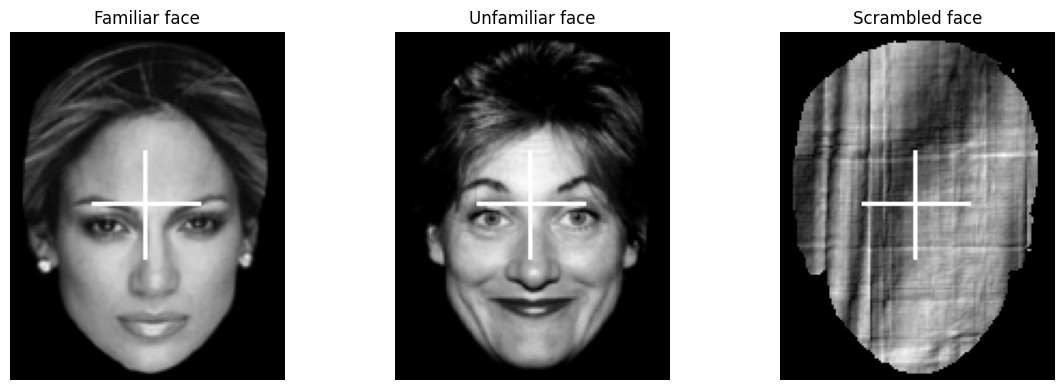

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load the .bmp images
familiar = imread('ds000117/stimuli/func/f001.bmp')
unfamiliar = imread('ds000117/stimuli/func/u001.bmp')
scrambled = imread('ds000117/stimuli/func/s001.bmp')

# Create a Matplotlib figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image on a subplot
axes[0].imshow(familiar, cmap='gray')
axes[0].set_title('Familiar face')
axes[0].axis('off')

axes[1].imshow(unfamiliar, cmap='gray')
axes[1].set_title('Unfamiliar face')
axes[1].axis('off')

axes[2].imshow(scrambled, cmap='gray')
axes[2].set_title('Scrambled face')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Download Data and install Python modules

In [3]:
# get func data of the mri session of 9 individuals  
PATTERN = "sub-0*/ses-mri/func"

!datalad install https://github.com/OpenNeuroDatasets/ds000117.git
!cd ds000117 && git checkout 1.0.5 && datalad get $PATTERN

install(error): /home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/ds000117 (dataset) [target path already exists and not empty, refuse to clone into target path]
HEAD is now at 12470d39 [OpenNeuro] Recorded changes
Total:   0%|                                   | 0.00/2.93G [00:00<?, ? Bytes/s]
Get sub-06/s .. _bold.nii.gz:   0%|            | 0.00/36.8M [00:00<?, ? Bytes/s]
Get sub-06/s .. _bold.nii.gz:   0%|    | 68.2k/36.8M [00:00<01:45, 349k Bytes/s]
Get sub-06/s .. _bold.nii.gz:   1%|     | 242k/36.8M [00:00<00:54, 676k Bytes/s]
Get sub-06/s .. _bold.nii.gz:   2%|    | 590k/36.8M [00:00<00:23, 1.53M Bytes/s]
Get sub-06/s .. _bold.nii.gz:   3%|   | 1.24M/36.8M [00:00<00:11, 3.01M Bytes/s]
Get sub-06/s .. _bold.nii.gz:   6%|▏  | 2.30M/36.8M [00:00<00:06, 5.30M Bytes/s]
Get sub-06/s .. _bold.nii.gz:  12%|▎  | 4.25M/36.8M [00:00<00:03, 9.54M Bytes/s]
Get sub-06/s .. _bold.nii.gz:  18%|▌  | 6.48M/36.8M [00:00<00:02, 13.4M Bytes/s]
Get sub-06/s .. _bold.nii.gz:

In [ ]:
# get preprocessed normalized func images of 9 individuals  
PATTERN_PREP = "sub-0*/ses-mri/func/*space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz"

!datalad install https://github.com/OpenNeuroDerivatives/ds000117-fmriprep.git
!cd ds000117-fmriprep && datalad get $PATTERN_PREP

In [5]:
%%capture
!pip install nilearn pandas scipy traits==7.1.0

## Load SPM and import Python and Nipype modules

In [6]:
import module
await module.purge(force=True)
await module.load('spm12/r7771')
await module.list()

['spm12/r7771']

In [7]:
import pandas as pd
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt
import json
import os
from os.path import join as opj
from scipy.io import loadmat

In [8]:
import nipype.algorithms.modelgen as model
from nipype.interfaces import spm
from nipype.interfaces.io import DataSink, DataGrabber
from nipype.interfaces.utility import IdentityInterface, Function
from nipype import Node, Workflow, MapNode
from nipype.algorithms.misc import Gunzip

In [9]:
import nipype
NIPYPE_VERSION = nipype.__version__
print(NIPYPE_VERSION)

1.10.0


In [10]:
from packaging.version import Version

if Version(NIPYPE_VERSION) <= Version("1.8.6"):
    print('Contrasts need to be defined manually and wont be computed automatically when they are defined in Level1Design using the factor_info parameter')
    
# starting in nipype version 1.8.7., when factor_info parameter is used in Level1design T and F contrasts (ess*, con*, spmF* and spmT* images) 
# are created automatically by in EstimateModel by SPM

## Analysis

### 1. First Level Analysis

#### Prepare Data Input

In [11]:
#base directories
data_base_dir = os.getcwd() 
experiment_dir = opj(data_base_dir, 'spm_analysis/') #where to store the working and datasink directories

#list of subject identifiers and runs
sub_list =  ['01', '02', '03', '04', '05', '06', '07', '08', '09']

#only take run 1 and 2 for computational reasons
run_id = [1,2]

In [12]:
#TR of functional images
with open(opj(data_base_dir,'ds000117/task-facerecognition_bold.json'), 'rt') as fp:
    task_info = json.load(fp)
TR = float(task_info['RepetitionTime'])
print('Repetition Time:', TR)

Repetition Time: 2.0


#### Start the workflow

In [13]:
wf = Workflow(name='level1_spm', base_dir=experiment_dir)
wf.config["execution"]["crashfile_format"] = "txt"

#### Input stream

In [14]:
infosource = Node(IdentityInterface(fields=["subject_id"]),
                  name="infosource")
infosource.iterables = [("subject_id", sub_list)]

##### SPM12 can accept NIfTI files as input, but only if they are not compressed ('unzipped'). Use Gunzip node to unzip the files, before feeding them it to the model specification node.

In [15]:
gunzip_func = MapNode(Gunzip(), name='gunzip_func', iterfield='in_file')

In [16]:
datagrabber = Node(interface=DataGrabber(
        infields=["subject_id","run_id"], outfields=["func", "events"]
    ), name="datagrabber"
)

# Specify task names and return a sorted filelist to ensure to match files to correct runs
datagrabber.inputs.run_id = run_id
datagrabber.inputs.sort_filelist = True
datagrabber.inputs.template = "*"
datagrabber.inputs.base_directory = data_base_dir

# Define arguments fill the wildcards in the below paths 
datagrabber.inputs.template_args = dict(
    func=[["subject_id","subject_id","run_id"]],
    events=[["subject_id","subject_id", "run_id"]]
)

datagrabber.inputs.field_template = dict(
    func= "ds000117-fmriprep/sub-%s/ses-mri/func/sub-%s_ses-mri_task-facerecognition_run-%d_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz",
    events="ds000117/sub-%s/ses-mri/func/sub-%s_ses-mri_task-facerecognition_run-0%d_events.tsv", 
)

wf.connect([
        (infosource, datagrabber, [("subject_id", "subject_id")])])

wf.connect([(datagrabber, gunzip_func, [('func', 'in_file')])])

#### First-level GLM
The subsequent task involves obtaining information such as stimuli type, onset, duration, and other regressors for integration into the GLM model. To accomplish this, a helper function needs to be created, which will be referred to as subjectinfo.

A TSV file for each run looks like this: 

In [17]:
!cat ds000117/sub-01/ses-mri/func/sub-01_ses-mri_task-facerecognition_run-01_events.tsv

onset	duration	circle_duration	stim_type	trigger	button_pushed	response_time	stim_file
0	.908	.534	FAMOUS	5	4	2.158	func/f013.bmp
3.273	.962	.586	FAMOUS	6	4	1.233	func/f013.bmp
6.647	.825	.546	UNFAMILIAR	13	4	1.183	func/u014.bmp
9.838	.968	.597	UNFAMILIAR	14	4	.930	func/u014.bmp
12.978	.904	.415	UNFAMILIAR	13	7	1.068	func/u016.bmp
16.219	.859	.558	UNFAMILIAR	14	7	1.207	func/u016.bmp
19.443	.804	.585	UNFAMILIAR	13	4	1.286	func/u010.bmp
22.55	.879	.526	UNFAMILIAR	14	4	1.008	func/u010.bmp
25.606	.866	.416	SCRAMBLED	17	7	1.929	func/s002.bmp
28.697	.884	.461	SCRAMBLED	18	4	1.300	func/s002.bmp
31.319	20.000	20.000	n/a	999	20000	20.000	func/i999.bmp
51.898	.974	.543	FAMOUS	5	7	2.477	func/f004.bmp
55.173	.925	.534	SCRAMBLED	17	7	1.372	func/s008.bmp
58.313	.985	.439	UNFAMILIAR	13	4	1.431	func/u012.bmp
61.587	.862	.533	FAMOUS	5	4	1.086	func/f012.bmp
64.677	.869	.461	FAMOUS	6	4	1.018	func/f012.bmp
67.75	.804	.446	SCRAMBLED	17	7	1.267	func/s007.bmp
70.774	.873	.445	SCRAMBLED	17	7	1.211	func/s011.b

As mentioned in the introduction, these event files will be adapted in the function 'subjectinfo' to demonstrate the setup of a 3x2 factorial design analysis. The original stimulus types (stim_types) FAMOUS, NONFAMILIAR, SCRAMBLED  will be replaced with F1 (first presentation of an image of a famous face)/ F2 (second presentation of image), U1/U2 and S1/S1 due to the first or second occurance of the respective stimulus file (stim_file). In addition, stimuli of stimulus type n/a are deleted.

In [18]:
# Get the subject information: to create a GLM model, Nipype needs a list of Bunch objects per run (session)

def subjectinfo(events):

    # packages need to be imported within the function for node to work (function is executed in a standalone environment)
    from nipype.interfaces.base import Bunch
    import pandas as pd
    from collections import OrderedDict

    trialinfo = pd.read_table(events)

    # Filter out rows where stim_type does not contain 'FAMOUS', 'UNFAMILIAR', or 'SCRAMBLED' --> n/a
    trialinfo = trialinfo[trialinfo['stim_type'].isin(['FAMOUS', 'UNFAMILIAR', 'SCRAMBLED'])].reset_index(drop=True)
    
    # Create a dictionary to store the count of occurrences for each stim_file
    stim_file_count = {}
    
    
    # Iterate over each row in the dataframe
    for index, row in trialinfo.iterrows():
        # Get the stim_file value for the current row
        stim_file = row['stim_file']
        
        # If the stim_file is not in the stim_file_count dictionary, add it with count 1
        if stim_file not in stim_file_count:
            stim_file_count[stim_file] = 1
        else:
            # Increment the count for the stim_file and update the dictionary
            stim_file_count[stim_file] += 1
        
        # Get the count of occurrences for the current stim_file
        count = stim_file_count[stim_file]
        
        # Determine the new stim_type based on the stim_file and its count
        if 'FAMOUS' in row['stim_type']:
            new_stim_type = f'F{count}'
        elif 'UNFAMILIAR' in row['stim_type']:
            new_stim_type = f'U{count}'
        else:
            # If it's not 'FAMOUS' or 'UNFAMILIAR', it must be 'SCRAMBLED'
            new_stim_type = f'S{count}'
        
        # Update the stim_type in the dataframe
        trialinfo.at[index, 'stim_type'] = new_stim_type

    
    # Define the custom sorting order (instead of an alphabetic ordering F1, F2, S1, S2, U1, U2
    sorting_order = OrderedDict([('F1', 1), ('F2', 2), ('U1', 3), ('U2', 4), ('S1', 5), ('S2', 6)])
    
    conditions = []
    onsets = []
    durations = []
    
    # Group trialinfo by 'stim_type' and iterate over groups
    grouped_trials = trialinfo.groupby('stim_type')
    for group_key in sorting_order.keys():  # Use keys() to iterate over keys
        group_data = grouped_trials.get_group(group_key)
        conditions.append(group_key)
        onsets.append(group_data['onset'].tolist())
        durations.append(group_data['duration'].tolist())

    subject_info = Bunch(conditions=conditions, 
                     onsets=onsets, 
                     durations=durations)
        
    return subject_info
    


getsubjectinfo = MapNode(Function(input_names=['events'],
                                output_names=['subject_info'],
                                function=subjectinfo),
                                name='getsubjectinfo', iterfield=['events'])

In [19]:
wf.connect(datagrabber, 'events', getsubjectinfo, 'events')

In [20]:
modelspec = Node(model.SpecifySPMModel(concatenate_runs=True,
                                input_units = 'secs',
                                output_units = 'secs',
                                time_repetition= TR, 
                                high_pass_filter_cutoff=128), #in secs, slow signal drifts with a period > 128 will be removed
                                name='modelspec')
                              
wf.connect(getsubjectinfo, 'subject_info', modelspec,'subject_info')
wf.connect(gunzip_func, 'out_file', modelspec, 'functional_runs')

##### Level1Design: canonical HRF

The design matrix will be constructed without including derivatives of the hemodynamic response function (HRF) and therefore assumes a constant delay and dispersion for the hemodynamic response.

*Starting in nipype version 1.8.7., when factor_info parameter is used in Level1design, T and F contrasts (ess, con, spmF and spmT images) are created automatically in EstimateModel by SPM. They need to be connected directly to a data output module*

The following lines automatically inform SPM to create a default set of
contrats for a factorial design.

In [21]:
# Level1Design - Generates an SPM design matrix
level1design = Node(spm.Level1Design(bases={'hrf':{'derivs': [0,0]}}, # no derivatives
                                timing_units='secs',
                                interscan_interval=TR, 
                                microtime_onset=8, #The onset/time-bin in seconds for alignment
                                microtime_resolution=16, #Number of time-bins per scan in secs
                                mask_threshold=0.8,
                                global_intensity_normalization='none',
                                volterra_expansion_order=1, #do not model interactions
                                model_serial_correlations='AR(1)'), # serial correlations --> autoregressive AR(1) model during Classical (ReML) parameter estimation
                                name='level1design')

if Version(NIPYPE_VERSION) > Version("1.8.6"):
# Factors need to match conditions: product of levels (here 6) needs to match number of condition names --> F1, F2, U1, U2, S1, S2
    level1design.inputs.factor_info = [dict(name = 'Face', levels = 3),
                                        dict(name = 'Rep', levels = 2)]
                            
wf.connect(modelspec,'session_info', level1design, 'session_info')

stty: 'standard input': Inappropriate ioctl for device


In [22]:
# EstimateModel - estimate the parameters of the model 
level1estimate = Node(spm.EstimateModel(estimation_method={'Classical':1}), 
                                   name='level1estimate')

wf.connect(level1design, 'spm_mat_file', level1estimate, 'spm_mat_file')

##### Specify GLM contrast for nipype<=1.8.6 
Contrasts need to be set up manually as they are not created automatically in EstimateModel when factor_info parameter is used in Level1Design.


In [23]:
condition_names =   ['F1', 'F2', 'U1', 'U2', 'S1', 'S2'] #The condition names must match the names listed in the subjectinfo function described above.

cond1 = ('Positive effect of condition', 'T', condition_names, [1, 1, 1, 1, 1, 1])

# positive effect face
face1 = ('Positive effect of Face_1', 'T', condition_names, [1, 1, -1, -1, 0, 0])
face2 = ('Positive effect of Face_2', 'T', condition_names, [0, 0, 1, 1, -1, -1])

# rep1 > rep2
rep1 = ('Positive effect of Rep', 'T', condition_names, [1, -1, 1, -1, 1, -1])

# positive interaction face x rep
int1 = ('Positive interaction of Face x Rep1', 'T', condition_names, [1, -1, -1, 1, 0, 0])
int2 = ('Positive interaction of Face x Rep2', 'T', condition_names, [0, 0, 1, -1, -1, 1])

contf1 = ['Average effect condition', 'F', [cond1]]
contf2 = ['Main effect Face', 'F', [face1, face2]]
contf3 = ['Main effect Rep', 'F', [rep1]]
contf4 = ['Interaction: Face x Rep', 'F', [int1, int2]]

contrasts = [contf1, contf2, contf3, contf4, cond1, face1, face2,  rep1,  int1, int2]

In [24]:
# EstimateContrast - explicit contrast estimation with nipype version <= 1.8.6 with the defined contrast list

if Version(NIPYPE_VERSION) <= Version("1.8.6"):
    level1conest = Node(spm.EstimateContrast(), 
                        name='level1conest')
    level1conest.inputs.contrasts = contrasts
    
                                                        
    wf.connect([(level1estimate, level1conest, [('spm_mat_file','spm_mat_file'),
                                                ('beta_images','beta_images'),
                                            ('residual_image','residual_image')])])
else:
    # NEW Nipype: contrasts already created in EstimateModel
    pass

#### Output stream

In [25]:
# save all results into one
datasink = Node(DataSink(), name='sinker')
datasink.inputs.base_directory=opj(experiment_dir, "level1_spm_results")

In [26]:
wf.connect(infosource, 'subject_id', datasink, 'container')

if Version(NIPYPE_VERSION)<= Version("1.8.6"):
    wf.connect([(level1conest, datasink,    [('spm_mat_file', '1stLevel.@spm_mat'),
                                            ('spmT_images', '1stLevel.@T'),
                                            ('con_images', '1stLevel.@con'),
                                            ('spmF_images', '1stLevel.@F'),
                                            ('ess_images', '1stLevel.@ess')]),
                                            ])
# starting in nipype version 1.8.7., when factor_info parameter is used in Level1Design T and F contrasts (ess*, con*, spmF* and spmT* images) 
# are created automatically by SPM in EstimateModel
else: 
    wf.connect(level1design, 'spm_mat_file', datasink, '1stLevel.@spm_mat')
    wf.connect([(level1estimate, datasink,  [
                                            ('spmT_images', '1stLevel.@T'),
                                            ('con_images', '1stLevel.@con'),
                                            ('spmF_images', '1stLevel.@F'),
                                            ('ess_images', '1stLevel.@ess')]),
                                            ])

In [27]:
subFolders = [('%s/1stLevel' % s, 'sub-%s/' % s) 
               for s in sub_list]

subFolders1 = [('_subject_id_%s'%(s), '')
              for s in sub_list]

subFolders.extend(subFolders1)
datasink.inputs.substitutions = subFolders

260120-17:11:00,987 nipype.workflow INFO:
	 Generated workflow graph: /home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level1_spm/graph.png (graph2use=colored, simple_form=True).


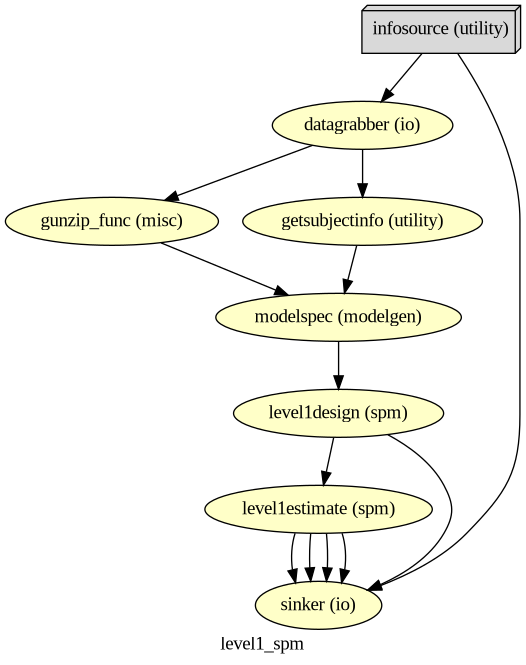

In [28]:
# Create 1st-level analysis output graph
wf.write_graph(graph2use='colored', format='png', simple_form=True)

# Visualize the graph
from IPython.display import Image
Image(filename=opj(wf.base_dir, wf.name, 'graph.png'))

In [29]:
wf.run(plugin="MultiProc") #will use all CPUs

260120-17:11:06,791 nipype.workflow INFO:
	 Workflow level1_spm settings: ['check', 'execution', 'logging', 'monitoring']
260120-17:11:06,835 nipype.workflow INFO:
	 Running in parallel.
260120-17:11:06,845 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 9 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:11:07,580 nipype.workflow INFO:
	 [Node] Setting-up "level1_spm.datagrabber" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level1_spm/_subject_id_01/datagrabber".
260120-17:11:07,580 nipype.workflow INFO:
	 [Node] Setting-up "level1_spm.datagrabber" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level1_spm/_subject_id_02/datagrabber".
260120-17:11:07,589 nipype.workflow INFO:
	 [Node] Setting-up "level1_spm.datagrabber" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level1_spm/_subject_id_

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:13:30,516 nipype.workflow INFO:
	 [Node] Finished "level1design", elapsed time 83.294683s.


stty: 'standard input': Inappropriate ioctl for device


260120-17:13:30,987 nipype.workflow INFO:
	 [Job 37] Completed (level1_spm.level1design).
260120-17:13:30,988 nipype.workflow INFO:
	 [Job 38] Completed (level1_spm.level1design).
260120-17:13:30,989 nipype.workflow INFO:
	 [Job 36] Completed (level1_spm.level1design).
260120-17:13:30,990 nipype.workflow INFO:
	 [Job 39] Completed (level1_spm.level1design).
260120-17:13:30,991 nipype.workflow INFO:
	 [Job 40] Completed (level1_spm.level1design).
260120-17:13:30,993 nipype.workflow INFO:
	 [Job 41] Completed (level1_spm.level1design).
260120-17:13:30,994 nipype.workflow INFO:
	 [Job 43] Completed (level1_spm.level1design).
260120-17:13:30,995 nipype.workflow INFO:
	 [Job 44] Completed (level1_spm.level1design).
260120-17:13:30,996 nipype.workflow INFO:
	 [Job 42] Completed (level1_spm.level1design).
260120-17:13:30,997 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 9 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:13:31,158 nip

stty: 'standard input': Inappropriate ioctl for device


260120-17:16:47,321 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 196.091498s.
260120-17:16:48,274 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.052117s.
260120-17:16:48,283 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.053127s.
260120-17:16:48,306 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.076599s.
260120-17:16:48,306 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.083802s.
260120-17:16:48,307 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.078842s.
260120-17:16:48,308 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.079299s.
260120-17:16:48,315 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.084413s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:16:48,342 nipype.workflow INFO:
	 [Node] Finished "level1estimate", elapsed time 197.114185s.
260120-17:16:49,149 nipype.workflow INFO:
	 [Job 45] Completed (level1_spm.level1estimate).
260120-17:16:49,151 nipype.workflow INFO:
	 [Job 46] Completed (level1_spm.level1estimate).
260120-17:16:49,152 nipype.workflow INFO:
	 [Job 47] Completed (level1_spm.level1estimate).
260120-17:16:49,153 nipype.workflow INFO:
	 [Job 48] Completed (level1_spm.level1estimate).
260120-17:16:49,154 nipype.workflow INFO:
	 [Job 49] Completed (level1_spm.level1estimate).
260120-17:16:49,155 nipype.workflow INFO:
	 [Job 50] Completed (level1_spm.level1estimate).
260120-17:16:49,160 nipype.workflow INFO:
	 [Job 51] Completed (level1_spm.level1estimate).
260120-17:16:49,161 nipype.workflow INFO:
	 [Job 52] Completed (level1_spm.level1estimate).
260120-17:16:49,162 nipype.workflow INFO:
	 [Job 53] Completed (level1_spm.level1estimate).
260120-17:16:49,164 nipype.workflow INFO:
	 [MultiProc] Running 0 ta

#### Visualize design matrix and list contrasts

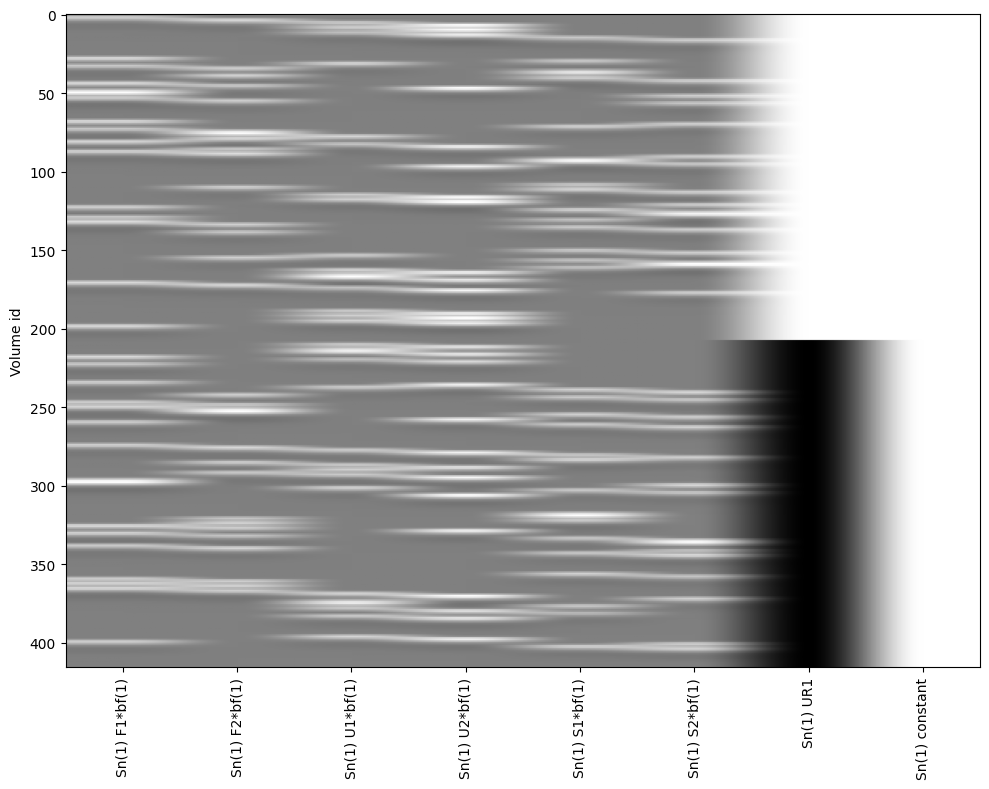

In [30]:
# Load
spm_data = loadmat(opj(experiment_dir, 'level1_spm_results/sub-01/SPM.mat'), 
                    struct_as_record=False, squeeze_me=True)

SPM = spm_data['SPM']

# Exract Data
designMatrix = SPM.xX.X
names = SPM.xX.name

# Get contrast name
if hasattr(SPM, 'xCon'):
    # xCon can be single object or list
    if isinstance(SPM.xCon, np.ndarray):
        names_contrast = [con.name for con in SPM.xCon]
    else:
        names_contrast = [SPM.xCon.name]
else:
    names_contrast = []

# Plot
normed_design = designMatrix / np.abs(designMatrix).max(axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(normed_design, aspect='auto', cmap='gray')
ax.set_ylabel('Volume id')
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names, rotation=90)
plt.tight_layout()
plt.show()


### 2. Second Level Analysis

For a factorial design with 2 factors there are 4 effects to test for: an overall effect, 2 main effects and one two-way interaction:

- To test (1) the overall effect, use a [1 1 1 1 1 1] contrast for each subject and take the resulting con images of all subjects into a one-sample t-test at the second level. Then specify a [1] F-contrast (at the second level) to test for significantly non-zero BOLD responses related to the paradigm. 

- To test for (2) the main effect of Factor Repetition (two levels), use a [1 -1 1 -1 1 -1] contrast for each subject and take the resulting con images into a one-sample t-test at the second level.  

- To test for (3) the main effect of Factor Face (three levels), use two contrasts per subject [1 1 -1 -1 0 0] and [0 0 1 1 -1 -1] and take all resulting con images (two per subject) into a two-sample t-test design at the second level. Then, use a [1 0; 0 1] F-contrast to test for this main effect.

- To test for (4) the interaction between Factors Face and Rep, use two contrasts per subject [1 -1 -1 1 0 0] and [0 0 1 -1 -1 1] and take all resulting con images (two per subject) into a two-sample t-test design at the second level. Use then a [1 0; 0 1] F-contrast to test for this interaction effect. 
 


#### 2.1 One Sample T-Test: Overall effect, main effect of repetition

Test for significantly non-zero BOLD responses over all subjects.

- con_0005: Positive effect

- con_0006: Positive Effect F>S 
- con_0007: Positive Effect S>U
  
- con_0008: Positive Effect of rep1>rep2
  
- con_0009: Positive Interaction Face (F/S) x Rep 
- con_0010: Positive Interaction Face (S/U) x Rep

In [42]:
wf_2ndlevel_onesample = Workflow(name='level2_spm_1sample', base_dir=experiment_dir)
wf_2ndlevel_onesample.config["execution"]["crashfile_format"] = "txt"

In [43]:
contrast_id = [5, 6, 7, 8, 9, 10] #contrasts con_0005 to con_0010

l2source = Node(DataGrabber(infields= ['con'], outfields=['contrasts']), name='l2source')

l2source.inputs.sort_filelist = True
l2source.inputs.base_directory = opj(experiment_dir, 'level1_spm_results')
l2source.inputs.template = '*'
l2source.inputs.field_template = dict(
   contrasts = '*/con_%04d.nii'
)

# iterate over all contrast images
l2source.iterables = [('con', contrast_id)]

In [44]:
# OneSampleTTest Design
onesamplettestdes = Node(interface=spm.OneSampleTTestDesign(), name="onesampttestdes")

wf_2ndlevel_onesample.connect([(l2source, onesamplettestdes, [('contrasts', 'in_files')])])

In [45]:
# EstimateModel - estimates the model
l2estimate = Node(spm.EstimateModel(estimation_method={'Classical':1}), name='level2estimate')

# EstimateContast - estimates group contrast
l2conestimate = Node(spm.EstimateContrast(group_contrast=True), name = 'level2conestimate')

con_1= ['Group', 'T', ['mean'], [1]]
#con_2= ['Group', 'F', [con_1]] # if an F contrast is also wanted

l2conestimate.inputs.contrasts = [con_1] # con_2, include in list if wanted

# Threshold - thresholds contrasts
level2thresh = Node(spm.Threshold(contrast_index=1,# which contrast in the SPM.mat to use --> here set for con_1: T stat
                                use_topo_fdr=True, # whether to use FDR over cluster extent probabilities
                                use_fwe_correction=False, # whether to use FWE (Bonferroni) correction for initial threshold 
                                extent_threshold=0, # minimum cluster size in voxels
                                height_threshold=0.005, # value for initial thresholding (defining clusters) - voxelwise
                                height_threshold_type='p-value',
                                extent_fdr_p_threshold=0.05), # p threshold on FDR corrected cluster size probabilities
                                name='level2thresh')

wf_2ndlevel_onesample.connect([(onesamplettestdes, l2estimate, [('spm_mat_file', 'spm_mat_file')]),
                    (l2estimate, l2conestimate, [('spm_mat_file', 'spm_mat_file'),
                                                ('beta_images', 'beta_images'),
                                                ('residual_image', 'residual_image')]),
                    (l2conestimate, level2thresh, [('spm_mat_file', 'spm_mat_file'),
                                                    ('spmT_images', 'stat_image')])

                    ])

In [46]:
datasink_2nd = Node(DataSink(), name='datasink_2nd')
datasink_2nd.inputs.base_directory=opj(experiment_dir, 'level2_spm_results_1sample')

wf_2ndlevel_onesample.connect([(l2conestimate, datasink_2nd, [('spm_mat_file', '2ndLevel.@spm_mat'),
                                                    ('spmT_images', '2ndLevel.@T'),
                                                    ('con_images', '2ndLevel.@con')]),
                    (level2thresh, datasink_2nd, [('thresholded_map',
                                                '2ndLevel.@threshold')])                               
                    ])

In [47]:
#replace _con_ with con
subFolders = [('2ndLevel/', '')] 

subFolders1 = [('_con_', 'con')] 
subFolders.extend(subFolders1)

datasink_2nd.inputs.substitutions = subFolders

260120-17:30:53,999 nipype.workflow INFO:
	 Generated workflow graph: /home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/graph.png (graph2use=colored, simple_form=True).


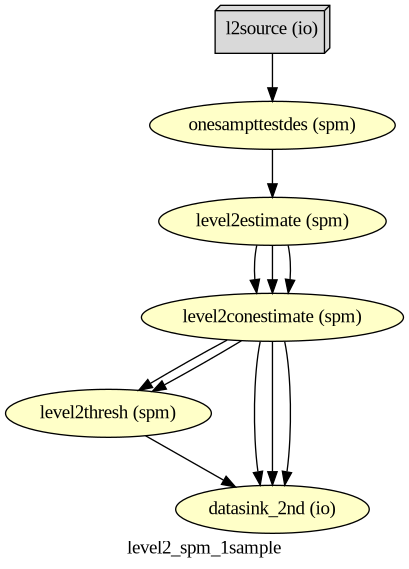

In [48]:
from IPython.display import Image
wf_2ndlevel_onesample.write_graph(graph2use='colored', format='png', simple_form=True)

Image(filename=opj(wf_2ndlevel_onesample.base_dir, wf_2ndlevel_onesample.name, 'graph.png'))

In [49]:
wf_2ndlevel_onesample.run(plugin="MultiProc")

260120-17:30:54,30 nipype.workflow INFO:
	 Workflow level2_spm_1sample settings: ['check', 'execution', 'logging', 'monitoring']
260120-17:30:54,60 nipype.workflow INFO:
	 Running in parallel.
260120-17:30:54,68 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 6 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:30:55,244 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.l2source" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_5/l2source".
260120-17:30:55,245 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.l2source" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_7/l2source".
260120-17:30:55,244 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.l2source" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_sp

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:31:48,93 nipype.workflow INFO:
	 [Job 6] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,94 nipype.workflow INFO:
	 [Job 7] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,95 nipype.workflow INFO:
	 [Job 8] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,96 nipype.workflow INFO:
	 [Job 9] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,97 nipype.workflow INFO:
	 [Job 10] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,98 nipype.workflow INFO:
	 [Job 11] Completed (level2_spm_1sample.onesampttestdes).
260120-17:31:48,100 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 6 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:31:48,291 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.level2estimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_5/level2estimate".
26

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:32:30,115 nipype.workflow INFO:
	 [Job 12] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,117 nipype.workflow INFO:
	 [Job 13] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,118 nipype.workflow INFO:
	 [Job 14] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,119 nipype.workflow INFO:
	 [Job 15] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,120 nipype.workflow INFO:
	 [Job 16] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,120 nipype.workflow INFO:
	 [Job 17] Completed (level2_spm_1sample.level2estimate).
260120-17:32:30,122 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 6 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:32:30,341 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.level2conestimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_5/level2conest

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:32:58,118 nipype.workflow INFO:
	 [Job 18] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,119 nipype.workflow INFO:
	 [Job 19] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,121 nipype.workflow INFO:
	 [Job 20] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,122 nipype.workflow INFO:
	 [Job 21] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,123 nipype.workflow INFO:
	 [Job 22] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,124 nipype.workflow INFO:
	 [Job 23] Completed (level2_spm_1sample.level2conestimate).
260120-17:32:58,125 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 6 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:32:58,341 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.level2thresh" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_6

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:33:18,129 nipype.workflow INFO:
	 [Job 24] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,130 nipype.workflow INFO:
	 [Job 25] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,132 nipype.workflow INFO:
	 [Job 26] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,133 nipype.workflow INFO:
	 [Job 27] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,134 nipype.workflow INFO:
	 [Job 28] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,135 nipype.workflow INFO:
	 [Job 29] Completed (level2_spm_1sample.level2thresh).
260120-17:33:18,136 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 6 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:33:18,355 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_1sample.datasink_2nd" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_1sample/_con_7/datasink_2nd".
260120-17:33:1

#### 2.1 Two Sample T-Test: Main effect of face, Interaction Face x Repetition

Main effect of face: enter the following 2 contrasts per subject into a two-sample t-test and use 1 0, 0 1 F contrast
- con_0006: Positive Effect F>S 

- con_0007: Positive Effect S>U



Interaction Face x Rep: enter the following 2 contrasts per subject into a two-sample t-test and use 1 0, 0 1 F contrast
- con_0009: Positive Interaction Face (F/S) x Rep 

- con_0010: Positive Interaction Face (S/U) x Rep

In [50]:
wf_2ndlevel_twosample = Workflow(name='level2_spm_2sample', base_dir=experiment_dir)
wf_2ndlevel_twosample.config["execution"]["crashfile_format"] = "txt"

In [51]:
contrast_id_1 = [6] #con_0006
contrast_id_2 = [7] #con_0007 

l2source2 = Node(DataGrabber(outfields=["group_1", "group_2"]), name='l2source')

l2source2.inputs.sort_filelist = True
l2source2.inputs.contrast_id_1 = contrast_id_1
l2source2.inputs.contrast_id_2 = contrast_id_2
l2source2.inputs.base_directory = opj(experiment_dir, 'level1_spm_results')
l2source2.inputs.template = '*' 

l2source2.inputs.template_args = dict(
    group_1=[["contrast_id_1"]],
    group_2=[["contrast_id_2"]])

l2source2.inputs.field_template = dict(
    group_1 = "*/con_%04d.nii",
    group_2 ="*/con_%04d.nii", 
)

In [52]:
# SecondLevelDesign - TwoSampleTTestDesign bases Factorial Design
twosamplettestdes = Node(interface=spm.TwoSampleTTestDesign(), name="twosampttestdes")
twosamplettestdes.inputs.dependent = False # measurements dependent between levels
twosamplettestdes.inputs.unequal_variance = True # equal or unequal between groups

wf_2ndlevel_twosample.connect([(l2source2, twosamplettestdes, [('group_1', 'group1_files')]),
                             (l2source2, twosamplettestdes, [('group_2', 'group2_files')])])

In [53]:
l2estimate2 = Node(spm.EstimateModel(estimation_method={'Classical':1}), name='level2estimate')

# EstimateContast - estimates group contrast
l2conestimate2 = Node(spm.EstimateContrast(group_contrast=True), name = 'level2conestimate')

con_1 = ('Pos effect level 1','T', ['Group_{1}', 'Group_{2}'],[1, 0])
con_2 = ('Pos effect level 2','T', ['Group_{1}', 'Group_{2}'],[0, 1])

con_3 = ('Main effect', 'F', [con_1, con_2]) # main effect of face

l2conestimate2.inputs.contrasts = [con_1, con_2, con_3] 


# Threshold - thresholds contrasts
level2thresh2 = MapNode(spm.Threshold(contrast_index=3,# which contrast in the SPM.mat to use --> here set for con_3: main effect
                                use_topo_fdr=True, # whether to use FDR over cluster extent probabilities
                                use_fwe_correction=False, # whether to use FWE (Bonferroni) correction for initial threshold 
                                extent_threshold=0, # minimum cluster size in voxels
                                height_threshold=0.005, # value for initial thresholding (defining clusters) - voxelwise
                                height_threshold_type='p-value',
                                extent_fdr_p_threshold=0.05), # P threshold on FDR corrected cluster size probabilities
                                iterfield=['stat_image'],
                                name='level2thresh')

wf_2ndlevel_twosample.connect([(twosamplettestdes, l2estimate2, [('spm_mat_file', 'spm_mat_file')]),
                    (l2estimate2, l2conestimate2, [('spm_mat_file', 'spm_mat_file'),
                                                ('beta_images', 'beta_images'),
                                                ('residual_image', 'residual_image')]),
                    (l2conestimate2, level2thresh2, [('spm_mat_file', 'spm_mat_file'),
                                                    ('spmT_images', 'stat_image')])
                    ])

In [54]:
datasink_2nd_2 = Node(DataSink(), name='datasink_2nd_2')
datasink_2nd_2.inputs.base_directory=opj(experiment_dir, 'level2_spm_results_2sample')

wf_2ndlevel_twosample.connect([(l2conestimate2, datasink_2nd_2, [('spm_mat_file', '2ndLevel.@spm_mat'),
                                                    ('spmT_images', '2ndLevel.@T'),
                                                    ('con_images', '2ndLevel.@con')]),
                    (level2thresh2, datasink_2nd_2, [('thresholded_map',
                                                '2ndLevel.@threshold')])                                                 
                    ])

In [55]:
subFolders = [('2ndLevel/', 'MainEffectFace/')]
subFolders1 = [('_con_', 'con')] 
subFolders2 = [('_level2thresh0', 'thresh_con1')]
subFolders3 = [('_level2thresh1', 'thresh_con2')]
subFolders4 = [('_level2thresh2', 'thresh_con3')]

subFolders.extend(subFolders1)
subFolders.extend(subFolders2)
subFolders.extend(subFolders3)
subFolders.extend(subFolders4)

datasink_2nd_2.inputs.substitutions = subFolders

260120-17:33:23,265 nipype.workflow INFO:
	 Generated workflow graph: /home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/graph.png (graph2use=colored, simple_form=True).


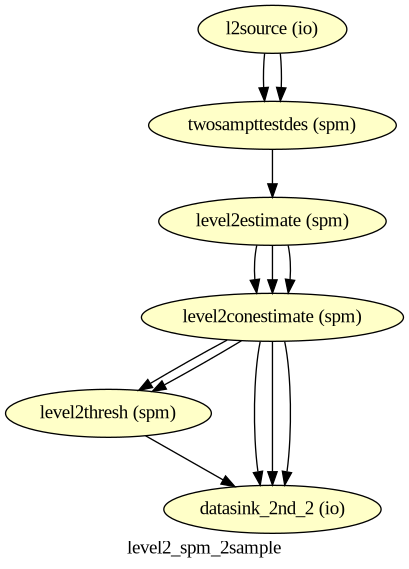

In [56]:
from IPython.display import Image
wf_2ndlevel_twosample.write_graph(graph2use='colored', format='png', simple_form=True)

Image(filename=opj(wf_2ndlevel_twosample.base_dir, wf_2ndlevel_twosample.name, 'graph.png'))

In [57]:
wf_2ndlevel_twosample.run(plugin="MultiProc")

260120-17:33:23,280 nipype.workflow INFO:
	 Workflow level2_spm_2sample settings: ['check', 'execution', 'logging', 'monitoring']
260120-17:33:23,286 nipype.workflow INFO:
	 Running in parallel.
260120-17:33:23,288 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:33:23,981 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.l2source" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/l2source".
260120-17:33:23,997 nipype.workflow INFO:
	 [Node] Executing "l2source" <nipype.interfaces.io.DataGrabber>
260120-17:33:24,3 nipype.workflow INFO:
	 [Node] Finished "l2source", elapsed time 0.002632s.
260120-17:33:25,299 nipype.workflow INFO:
	 [Job 0] Completed (level2_spm_2sample.l2source).
260120-17:33:25,305 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free

stty: 'standard input': Inappropriate ioctl for device


260120-17:33:47,295 nipype.workflow INFO:
	 [Job 1] Completed (level2_spm_2sample.twosampttestdes).
260120-17:33:47,297 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:33:47,498 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.level2estimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2estimate".
260120-17:33:47,509 nipype.workflow INFO:
	 [Node] Executing "level2estimate" <nipype.interfaces.spm.model.EstimateModel>
260120-17:33:49,299 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 219.28/219.48, Free processors: 31/32, Free GPU slot:0/0.
                     Currently running:
                       * level2_spm_2sample.level2estimate
260120-17:34:15,148 nipype.workflow INFO:
	 [Node] Finished "level2estimate", elapsed time 27.637034s.
260120-17:34:1

stty: 'standard input': Inappropriate ioctl for device


260120-17:34:15,503 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.level2conestimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2conestimate".
260120-17:34:15,524 nipype.workflow INFO:
	 [Node] Executing "level2conestimate" <nipype.interfaces.spm.model.EstimateContrast>
260120-17:34:17,304 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 219.28/219.48, Free processors: 31/32, Free GPU slot:0/0.
                     Currently running:
                       * level2_spm_2sample.level2conestimate
260120-17:34:37,289 nipype.workflow INFO:
	 [Node] Finished "level2conestimate", elapsed time 21.761631s.
260120-17:34:37,306 nipype.workflow INFO:
	 [Job 3] Completed (level2_spm_2sample.level2conestimate).
260120-17:34:37,308 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot

stty: 'standard input': Inappropriate ioctl for device


260120-17:34:39,307 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:34:39,494 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh0" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2thresh/mapflow/_level2thresh0".
260120-17:34:39,495 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh1" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2thresh/mapflow/_level2thresh1".
260120-17:34:39,496 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh2" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2thresh/mapflow/_level2thresh2".
260120-17:34:39,517 nipype.workflow INFO:
	 [Node] Executing "_level2thresh1" <nipype.interfaces.spm.model.Threshold>
260120-17:34:39,518 nipyp

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:34:59,317 nipype.workflow INFO:
	 [Job 6] Completed (_level2thresh0).
260120-17:34:59,318 nipype.workflow INFO:
	 [Job 7] Completed (_level2thresh1).
260120-17:34:59,319 nipype.workflow INFO:
	 [Job 8] Completed (_level2thresh2).
260120-17:34:59,320 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:34:59,557 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh0" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2thresh/mapflow/_level2thresh0".
260120-17:34:59,563 nipype.workflow INFO:
	 [Node] Cached "_level2thresh0" - collecting precomputed outputs
260120-17:34:59,564 nipype.workflow INFO:
	 [Node] "_level2thresh0" found cached.
260120-17:34:59,567 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh1" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/

In [58]:
contrast_id_1 = [9] #con_0009
contrast_id_2 = [10] #con_0010 

l2source2.inputs.contrast_id_1 = contrast_id_1
l2source2.inputs.contrast_id_2 = contrast_id_2

subFolders = [('2ndLevel/', 'InteractionFace_Repetition/')]
subFolders.extend(subFolders1)
subFolders.extend(subFolders2)
subFolders.extend(subFolders3)
subFolders.extend(subFolders4)

datasink_2nd_2.inputs.substitutions = subFolders

wf_2ndlevel_twosample.run(plugin="MultiProc")

260120-17:35:05,447 nipype.workflow INFO:
	 Workflow level2_spm_2sample settings: ['check', 'execution', 'logging', 'monitoring']
260120-17:35:05,453 nipype.workflow INFO:
	 Running in parallel.
260120-17:35:05,455 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:35:05,654 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.l2source".
260120-17:35:05,654 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.l2source".
260120-17:35:06,219 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.l2source" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/l2source".
260120-17:35:06,225 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.l2source".
260120-17:35:06,233 nipype.workflow INFO:
	 [Node] Executing "l2source" <nipype.interfaces.io.DataGra

stty: 'standard input': Inappropriate ioctl for device


260120-17:35:31,464 nipype.workflow INFO:
	 [Job 1] Completed (level2_spm_2sample.twosampttestdes).
260120-17:35:31,466 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:35:31,643 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2estimate".
260120-17:35:31,644 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2estimate".
260120-17:35:31,649 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.level2estimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2estimate".
260120-17:35:31,653 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2estimate".
260120-17:35:31,670 nipype.workflow INFO:
	 [Node] Executing "level2estimate" <nipype.interfaces.spm.model.EstimateModel>
260120-17:35:33,464 nipype.workflow INFO:
	 

stty: 'standard input': Inappropriate ioctl for device


260120-17:35:59,481 nipype.workflow INFO:
	 [Job 2] Completed (level2_spm_2sample.level2estimate).
260120-17:35:59,483 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:35:59,683 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2conestimate".
260120-17:35:59,684 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2conestimate".
260120-17:35:59,703 nipype.workflow INFO:
	 [Node] Setting-up "level2_spm_2sample.level2conestimate" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2conestimate".
260120-17:35:59,707 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2conestimate".
260120-17:35:59,718 nipype.workflow INFO:
	 [Node] Executing "level2conestimate" <nipype.interfaces.spm.model.EstimateContrast>
260120-17:36:01,482 nipy

stty: 'standard input': Inappropriate ioctl for device


260120-17:36:25,484 nipype.workflow INFO:
	 [Job 3] Completed (level2_spm_2sample.level2conestimate).
260120-17:36:25,492 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:36:27,484 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:36:27,675 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh0".
260120-17:36:27,676 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh0".
260120-17:36:27,678 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh1".
260120-17:36:27,679 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh1".
260120-17:36:27,681 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh2".
260120-17:36:27,682 nipype.workflow INFO:
	 [Node] Outdated cache found for "_level2thresh2".


stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


260120-17:36:51,501 nipype.workflow INFO:
	 [Job 6] Completed (_level2thresh0).
260120-17:36:51,502 nipype.workflow INFO:
	 [Job 7] Completed (_level2thresh1).
260120-17:36:51,503 nipype.workflow INFO:
	 [Job 8] Completed (_level2thresh2).
260120-17:36:51,504 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 219.48/219.48, Free processors: 32/32, Free GPU slot:0/0.
260120-17:36:51,686 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2thresh".
260120-17:36:51,687 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2thresh".
260120-17:36:51,710 nipype.workflow INFO:
	 [Node] Outdated cache found for "level2_spm_2sample.level2thresh".
260120-17:36:51,721 nipype.workflow INFO:
	 [Node] Setting-up "_level2thresh0" in "/home/jovyan/Git_repositories/neurodeskedu/books/examples/functional_imaging/spm_analysis/level2_spm_2sample/level2thresh/mapflow/_level2thresh0".
260120-17:36:51,724 nipype.wor

## Results
The group analysis was only done on N=9 subjects, a voxel-wise threshold of p<0.005 was chosen and a cluster-wise FDR threshold of p<0.05 to correct for multiple comparisons.

### Look at the positive effect using the plot_stat_map plotting method of nilearn

/tmp/ipykernel_108607/4078776260.py:1: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plotting.plot_stat_map(opj(experiment_dir, 'level2_spm_results_1sample/con5/spmT_0001_thr.nii'), title='Positive Effect', dim=1, display_mode='y', cut_coords=(-45, -30, -15, 0, 15), threshold=2, vmax=8, cmap='viridis');


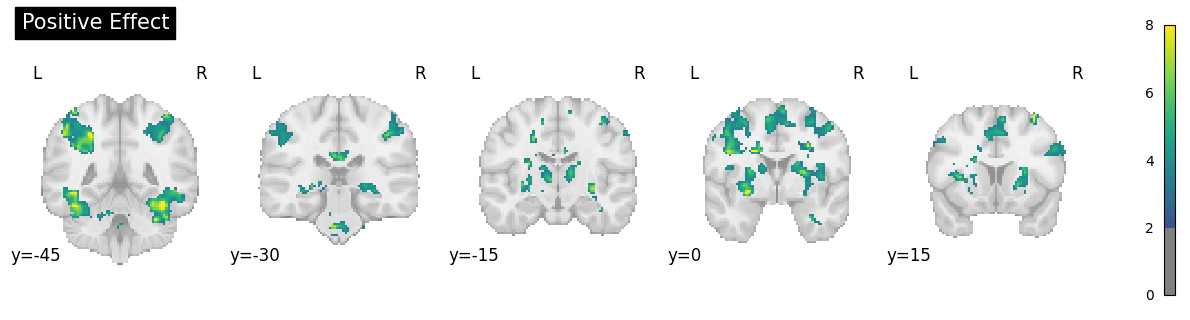

In [59]:
plotting.plot_stat_map(opj(experiment_dir, 'level2_spm_results_1sample/con5/spmT_0001_thr.nii'), title='Positive Effect', dim=1, display_mode='y', cut_coords=(-45, -30, -15, 0, 15), threshold=2, vmax=8, cmap='viridis');

#### Look at the results using the glass brain plotting method of nilearn

/tmp/ipykernel_108607/3476432501.py:1: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con5/spmT_0001_thr.nii'),
/tmp/ipykernel_108607/3476432501.py:4: UserWarning: empty mask
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con6/spmT_0001_thr.nii'),
/tmp/ipykernel_108607/3476432501.py:7: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con7/spmT_0001_thr.nii'),
/tmp/ipykernel_108607/3476432501.py:10: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con8/spmT_0001_thr.nii'),
/tmp/ipykernel_108607/3476432501.py:13: UserWarning: empty mask
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con9/spmT_0001_thr.nii

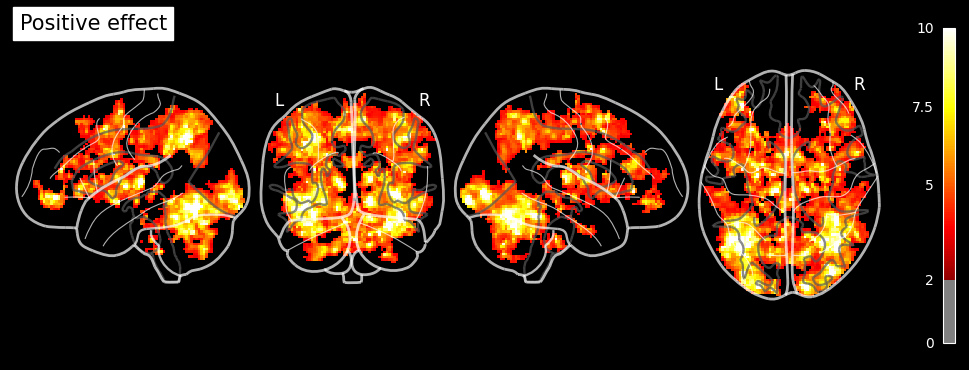

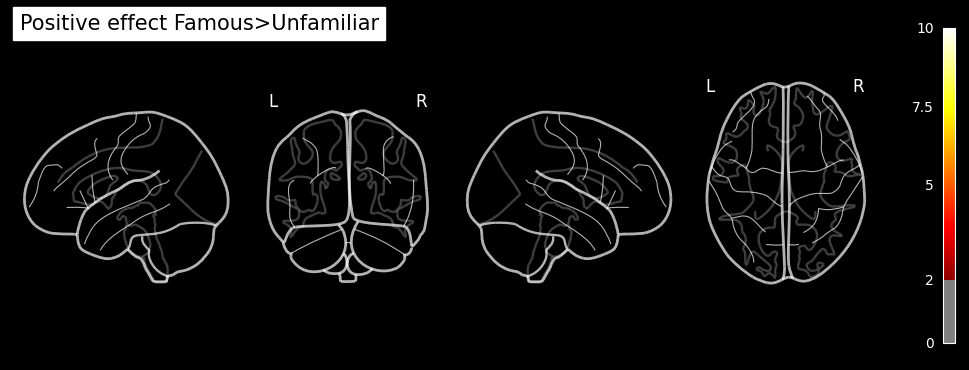

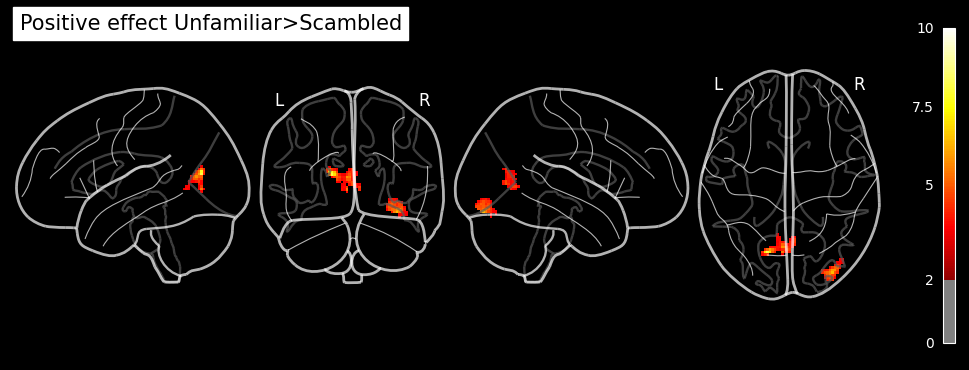

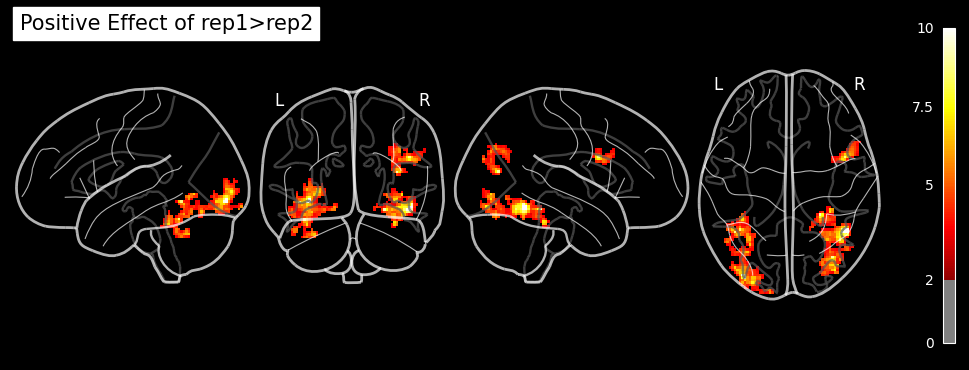

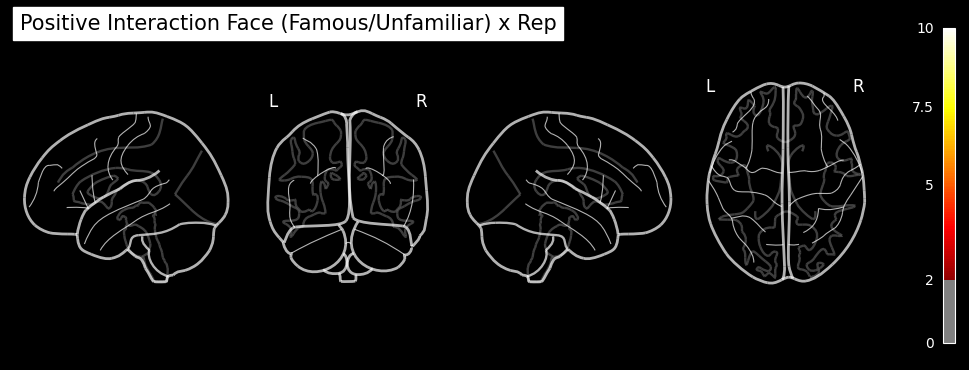

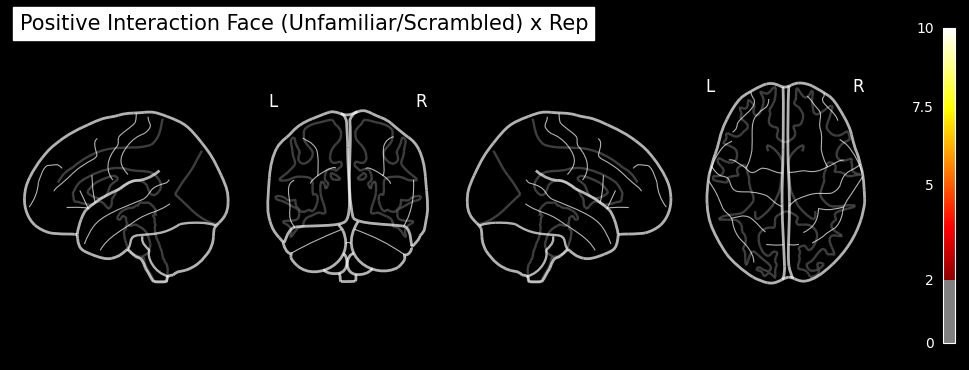

In [60]:
plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con5/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive effect');

plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con6/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive effect Famous>Unfamiliar');

plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con7/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive effect Unfamiliar>Scambled');

plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con8/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive Effect of rep1>rep2');

plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con9/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive Interaction Face (Famous/Unfamiliar) x Rep');

plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_1sample/con10/spmT_0001_thr.nii'), 
                          colorbar=True, threshold=2, display_mode='lyrz', black_bg=True, vmax=10, title='Positive Interaction Face (Unfamiliar/Scrambled) x Rep');

#### Visualize main effects face and interaction face x repetition

/tmp/ipykernel_108607/281995149.py:1: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_2sample/MainEffectFace/thresh_con3/spmF_0003_thr.nii'),


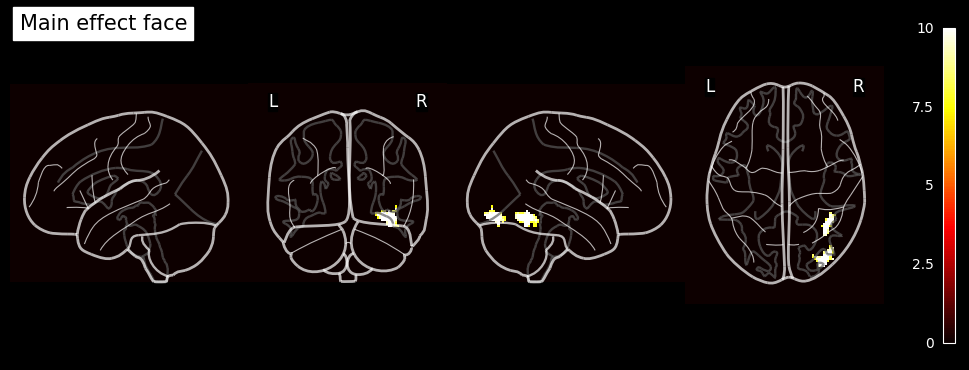

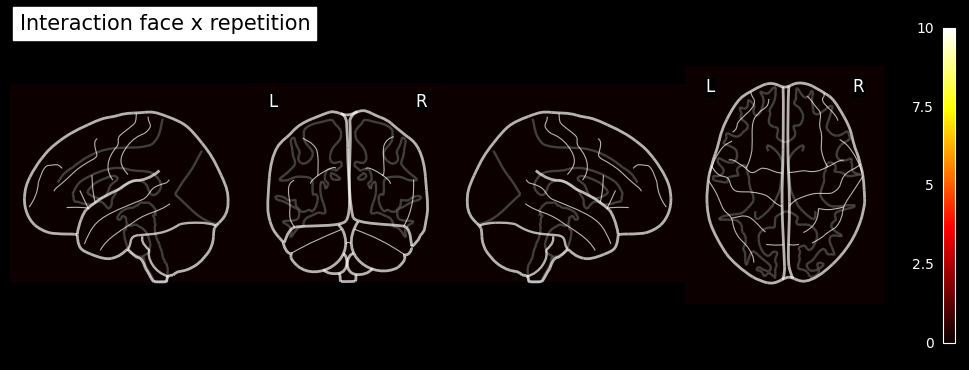

In [61]:
plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_2sample/MainEffectFace/thresh_con3/spmF_0003_thr.nii'), 
                          colorbar=True, display_mode='lyrz', black_bg=True, vmax=10, title='Main effect face');


plotting.plot_glass_brain(opj(experiment_dir, 'level2_spm_results_2sample/InteractionFace_Repetition/thresh_con3/spmF_0003_thr.nii'), 
                          colorbar=True, display_mode='lyrz', black_bg=True, vmax=10, title='Interaction face x repetition');

#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [62]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2026-01-20T17:37:20.910180+00:00

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 9.7.0

Compiler    : GCC 14.3.0
OS          : Linux
Release     : 5.15.0-164-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython   : 9.7.0
json      : 2.0.9
matplotlib: 3.10.8
nilearn   : 0.13.0
nipype    : 1.10.0
numpy     : 2.3.5
packaging : 25.0
pandas    : 2.3.3
scipy     : 1.16.3

